In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas
import geopandas 
!pip install contextily
import contextily as ctx


     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 69.8 MB/s 
     |████████████████████████████████| 6.3 MB 47.7 MB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [ ]:
# caricare il geodataframe delle piste ciclabili bike_ciclabili.zip

In [ ]:
cycle_routes = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas/bike_ciclabili.zip')
cycle_routes

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9001,1064,PIAZZA VENTICINQUE APRILE,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,43.0,"LINESTRING (9.18700 45.48095, 9.18696 45.48085..."
1,9002,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,465.0,"LINESTRING (9.24192 45.43931, 9.24202 45.43939..."
2,9003,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,60.0,"LINESTRING (9.23979 45.43996, 9.23991 45.43998..."
3,9004,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,6.0,"LINESTRING (9.23902 45.44251, 9.23898 45.44256)"
4,9005,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,28.0,"LINESTRING (9.23990 45.43999, 9.23985 45.44009..."
...,...,...,...,...,...,...,...,...,...,...,...
3160,12932,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,4.0,"LINESTRING (9.14977 45.46021, 9.14979 45.46024)"
3161,12933,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,10.0,"LINESTRING (9.14966 45.46050, 9.14972 45.46057)"
3162,12934,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,5.0,"LINESTRING (9.14963 45.46046, 9.14966 45.46050)"
3163,12935,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,9.0,"LINESTRING (9.14957 45.46039, 9.14963 45.46046)"


In [ ]:
# visualizzare il geodataframe

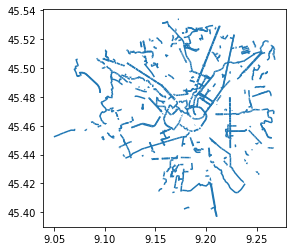

In [ ]:
cycle_routes.plot()

In [ ]:
# caricare il geodataframe dei quartieri ds964_nil_wm.zip

In [ ]:
districts = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas/ds964_nil_wm.zip')
districts

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
# visualizza la mappa dei quartieri e delle piste ciclabili

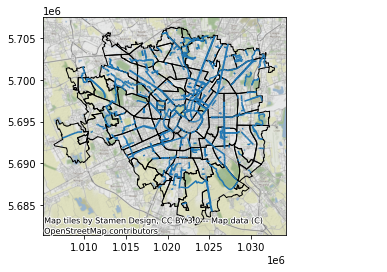

In [ ]:
ax = districts.to_crs(epsg=3857).plot(facecolor='none',edgecolor='k')
cycle_routes.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)

In [ ]:
# creare una geoserie con le informazioni sulla ciclabile di via Melchiorre Gioia e visualizzarla

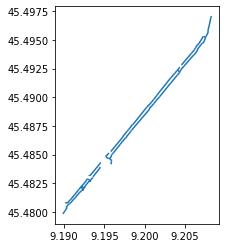

In [ ]:
MelchiorreGioia = cycle_routes[cycle_routes.anagrafica== 'VIA MELCHIORRE GIOIA']
MelchiorreGioia.plot()


In [ ]:
# trovare tutti i quartieri attraversati da questa pista ciclabile

In [ ]:
distMG = districts[districts.intersects(MelchiorreGioia.unary_union)]

In [ ]:
# visualizzare su una mappa la pista ciclabile e i quartieri attraversati (utilizzare i colori presenti nell'esempio)

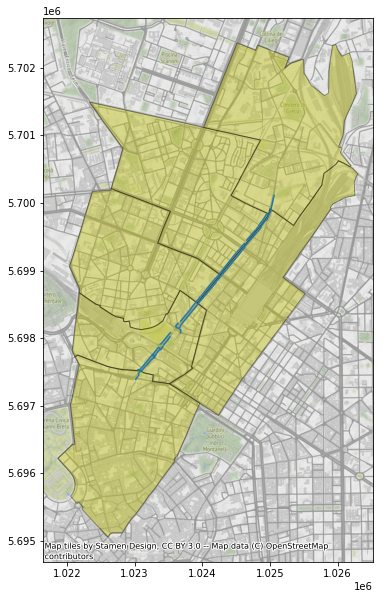

In [ ]:
ax = distMG.to_crs(epsg=3857).plot(facecolor="y",edgecolor='k',alpha=.4,figsize=(10,10))
MelchiorreGioia.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)

In [ ]:
# caricare il geodataframe delle fontanelle Fontanelle.zip

In [ ]:
fontaneMilano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas/Fontanelle.zip')
fontaneMilano

,Fonte,Licenza,geometry
0,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.16165 45.47091 0.00000)
1,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.23184 45.46831 0.00000)
2,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.14380 45.48017 0.00000)
3,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.14401 45.48319 0.00000)
4,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.11746 45.49320 0.00000)
...,...,...,...
77,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.22943 45.47751 0.00000)
78,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.22730 45.47965 0.00000)
79,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.22773 45.47728 0.00000)
80,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.22815 45.47994 0.00000)


In [ ]:
# visualizzare il geodataframe su una mappa

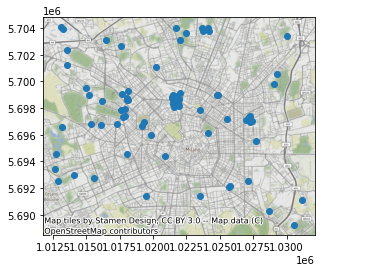

In [ ]:
ax = fontaneMilano.to_crs(3857).plot()
ctx.add_basemap(ax)

In [ ]:
# visualizzare su una mappa le fontanelle e i quartieri in cui si trovano.
# non visualizzare i quartieri in cui non ci sono fontanelle

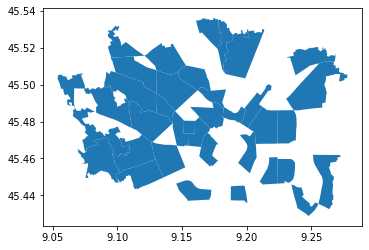

In [ ]:
districtsFontane = districts[districts.intersects(fontaneMilano.unary_union)]
districtsFontane.plot()

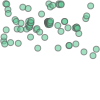

In [ ]:
fontaneMilano.unary_union

In [ ]:
# colorare i quartieri in modo proporzionale al numero di fontanelle presenti (giallo molte fontanelle, blu scuro poche fontanelle)
# non evidenziare i quartieri senza fontanelle

In [ ]:
districtsFontane['N_Fontane'] = 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


ImportError: ignored

In [ ]:
ax = districtsFontane.to_crs(epsg=3857).plot(column='')

In [ ]:
# visalizzare la mappa precedente facendo in modo che i quartieri con fontanelle siano colorati con gradazioni di rosso
# e quelli senza fontanelle con gradazioni di grigio